In [134]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
# Your code here


In [135]:
# Read the datafile "covid.csv"
df = pd.read_csv("covid.csv")

# Take a quick look at the dataframe
df.head()


,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,49.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,59.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [136]:
# Check if there are any missing or Null values
df.isnull().sum()


age             6
sex             8
cough          11
fever          15
chills          4
sore_throat     6
headache        2
fatigue         4
Urgency         0
dtype: int64

In [137]:
### edTest(test_na) ###

# Find the number of rows with missing values
num_null = df.isnull().any(axis=1).sum()
print("Number of rows with null values:", num_null)


Number of rows with null values: 37


In [138]:
# kNN impute the missing data
# Use a k value of 5
imputer = KNNImputer(n_neighbors=5)
# Your code here


In [139]:
### edTest(test_impute) ###
# Replace the original dataframe with the imputed data, continue to use df for the dataframe
df[['age','sex','cough','fever','chills','sore_throat','headache','fatigue']] = imputer.fit_transform(df[['age','sex','cough','fever','chills','sore_throat','headache','fatigue']])
# Your code here
    

## EDA

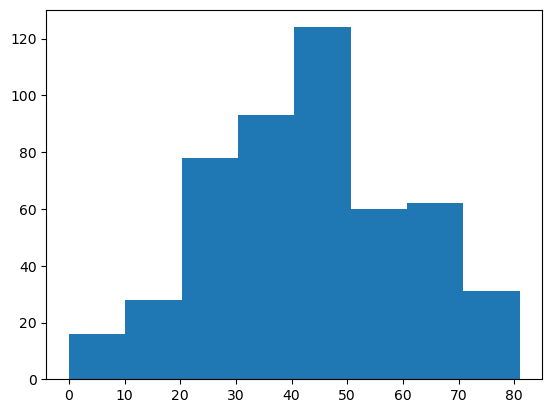

In [140]:
# Plot an appropriate graph to answer the following question
plt.hist(df.age[df.Urgency==1], bins=8, label='Age')
plt.show()
# Your code here


### ⏸ Which age group has the most urgent need for a hospital bed?

#### A. 60 - 70 

#### B. 50 - 60 

#### C. 20 - 30

#### D. 40 - 50

In [141]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'D'


In [142]:
df['cough'].unique()

array([0. , 1. , 0.6, 0.4, 0.2])

In [143]:
freq = []
cols=['cough','fever','sore_throat','fatigue']
for col in cols:
    fq = df[col][df['Urgency']==1].apply(lambda x: 0 if x == 0 else 1).sum()
    freq.append(fq)

freq


[34, 126, 3, 3]

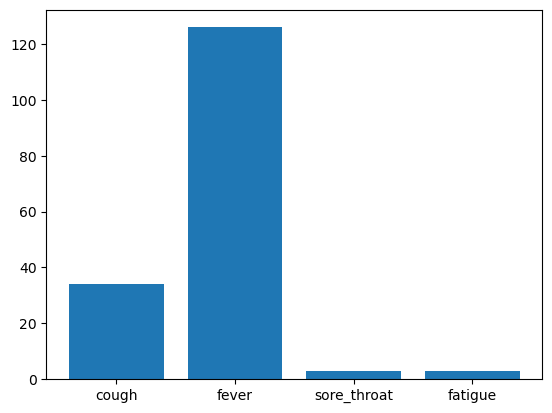

In [144]:
# Plot an appropriate graph to answer the following question    
# Your code here
plt.bar(cols, freq)
plt.show()

### ⏸ Among the following symptoms, which is the most common one for patients with urgent need of hospitalization?

#### A. Cough

#### B. Fever

#### C. Sore Throat

#### D. Fatigue

In [145]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer2 = 'B'


In [146]:
freq1 = []
cols=['cough','fever','sore_throat','fatigue']
for col in cols:
    fq = df[col][df['Urgency']==0].apply(lambda x: 0 if x == 0 else 1).sum()
    freq1.append(fq)

freq

[34, 126, 3, 3]

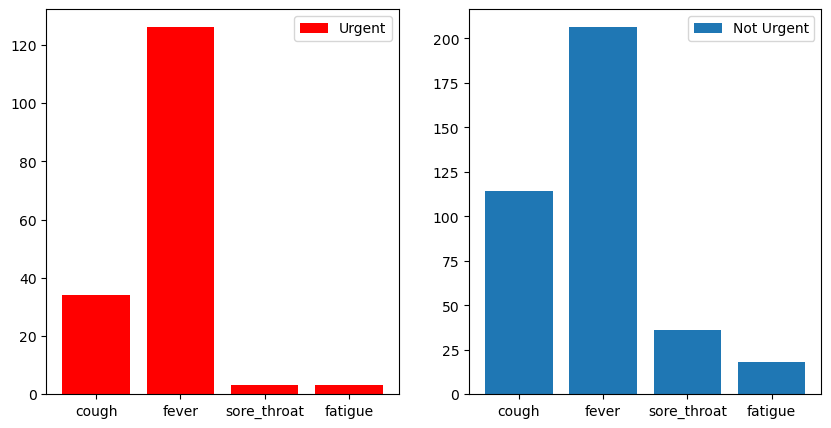

In [147]:
# Plot an appropriate graph to answer the following question    
# Your code here
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].bar(cols, freq, color ='red', label='Urgent')
ax[1].bar(cols, freq1, label='Not Urgent')
ax[0].legend()
ax[1].legend()


### ⏸ As compared to patients with urgent need of hospitalization, patients with no urgency have cough as a more common symptom?

#### A. True

#### B. False

#### C. It is the same

#### D. Cannot say

In [148]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer3 = 'A'


### Train Test Split

In [149]:
### edTest(test_split) ###
# Split the data into train and test sets with 70% for training
# Use random state of 60 and set of data as the train split

# Your code here
df_train, df_test = train_test_split(df, train_size =0.7, random_state=60)

In [150]:
# Save the train data into a csv called "covid_train.csv"
# Remember to not include the default indices
df_train.to_csv("covid_train.csv")

# Save the test data into a csv called "covid_test.csv"
# Remember to not include the default indices
df_test.to_csv("covid_test.csv")
